# ComCat Event History

In [1]:
%matplotlib inline

In [2]:
from libcomcat.dataframes import get_history_data_frame, split_history_frame, PRODUCTS
from libcomcat.search import get_event_by_id
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Use this function to download a summary DataFrame of all of the products associated with a given ComCat ID. We'll use the M7.1 event from the Ridgecrest Earthquake Sequence in July 2019.

In [3]:
dataframe, event = get_history_data_frame('ci38457511')

Use head() to inspect the columns and first five rows. The products are sorted by "update time", which is supposed to be the time the PDL client sends the product, but some producers override this manually.

In [4]:
print(len(dataframe))
dataframe.head()

1328


,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Update Time,Elapsed (min),Description
1285,phase-data,ci38457511,ci38457511,True,ci,1,2019-07-06 03:22:22.060,2.5,Magnitude# 7.1|Depth# -0.9|Time# 2019-07-06 03...
1272,origin,ci38457511,ci38457511,True,ci,1,2019-07-06 03:22:22.060,2.5,Magnitude# 7.1|Depth# -0.9|Time# 2019-07-06 03...
0,dyfi,ci38457511,ci38457511,True,us,1,2019-07-06 03:23:03.442,3.2,Max MMI# 3.8|NumResponses# 15
1286,phase-data,ci38457511,ci38457511,True,ci,2,2019-07-06 03:24:53.240,5.0,Magnitude# 6.9|Depth# -0.9|Time# 2019-07-06 03...
1273,origin,ci38457511,ci38457511,True,ci,2,2019-07-06 03:24:53.240,5.0,Magnitude# 6.9|Depth# -0.9|Time# 2019-07-06 03...


The dataframe we've downloaded has all kinds of products in it. We can use the split_history_frame() function to extract just the origins and look at those.

In [5]:
origin_frame = split_history_frame(dataframe,product='origin')
origin_frame

,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Update Time,Elapsed (min),Magnitude,Depth,Time,Time Offset (sec),Location,Distance from Auth. Origin (km),Magnitude Type,Location Method
0,origin,ci38457511,ci38457511,True,ci,1,2019-07-06 03:22:22.060,2.5,7.1,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,me,unknown
1,origin,ci38457511,ci38457511,True,ci,2,2019-07-06 03:24:53.240,5.0,6.9,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,mw,unknown
2,origin,ci38457511,at00pu7alg,True,at,1,2019-07-06 03:25:49.786,5.9,7.1,100.0,2019-07-06 03:20:04,11.0,"(35.488,-117.923)",42.8,Mi,l
3,origin,ci38457511,ci38457511,True,ci,3,2019-07-06 03:27:00.170,7.1,6.9,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,mw,unknown
4,origin,ci38457511,pt19187000,True,pt,1,2019-07-06 03:33:09.715,13.3,7.1,100.0,2019-07-06 03:19:53,-0.0,"(35.500,-117.900)",40.4,Mi,u
5,origin,ci38457511,us70004bn0,True,us,1,2019-07-06 03:37:21.040,17.5,7.1,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.767,-117.605)",0.6,mww,unknown
6,origin,ci38457511,ci38457511,True,ci,4,2019-07-06 03:42:15.950,22.4,7.1,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,mh,unknown
7,origin,ci38457511,ci38457511,True,ci,5,2019-07-06 04:01:42.060,41.8,7.1,-0.9,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,mh,unknown
8,origin,ci38457511,ci38457511,True,ci,6,2019-07-06 04:41:22.640,81.5,7.1,17.0,2019-07-06 03:19:52.630000,-0.4,"(35.766,-117.605)",0.6,mh,unknown
9,origin,ci38457511,us70004bn0,True,us,2,2019-07-06 06:43:30.040,203.6,7.1,17.0,2019-07-06 03:19:52.630000,-0.4,"(35.767,-117.605)",0.6,mww,unknown


Make a plot showing all of the depths, colored by contributing network.

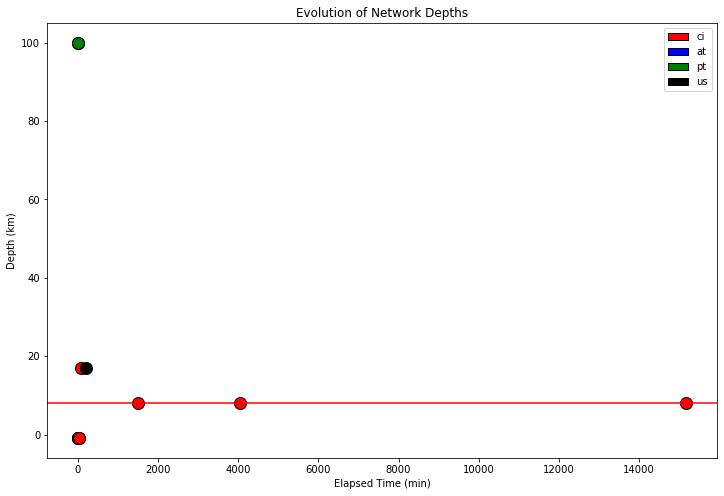

In [7]:
fig = plt.figure(figsize=(12,8))
colors = ['r','b','g','k','m']
nets = origin_frame['Product Source'].unique().tolist()
labels = {}
for idx, row in origin_frame.iterrows():
    netidx = nets.index(row['Product Source'])
    color = colors[netidx]
    line = plt.plot(row['Elapsed (min)'],row['Depth'], mfc=color,mec='k',marker='.', ms=24)
    if color not in labels:
        labels[color] = nets[netidx]

patches = []
for color, network in labels.items():
    tpatch = mpatches.Circle(xy=(0,0),color=color, label=network, ec='k')
    patches.append(tpatch)
plt.legend(handles=patches);
plt.title('Evolution of Network Depths');
plt.xlabel('Elapsed Time (min)');
plt.ylabel('Depth (km)');
plt.axhline(y=event.depth,color='r');

Let's similarly split out DYFI products.

In [8]:
dyfi_frame = split_history_frame(dataframe,product='dyfi')
print(len(dyfi_frame))
dyfi_frame.head()

1229


,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Update Time,Elapsed (min),Max MMI,NumResponses
0,dyfi,ci38457511,ci38457511,True,us,1,2019-07-06 03:23:03.442,3.2,3.8,15.0
1,dyfi,ci38457511,ci38457511,True,us,2,2019-07-06 03:26:31.983,6.6,9.1,35.0
2,dyfi,ci38457511,ci38457511,True,us,3,2019-07-06 03:33:07.443,13.2,9.1,68.0
3,dyfi,ci38457511,ci38457511,True,us,4,2019-07-06 03:39:33.071,19.7,9.1,121.0
4,dyfi,ci38457511,ci38457511,True,us,5,2019-07-06 03:43:08.909,23.3,9.1,131.0


DYFI product updates arrive frequently, so we can make a figure showing the number of responses with time.

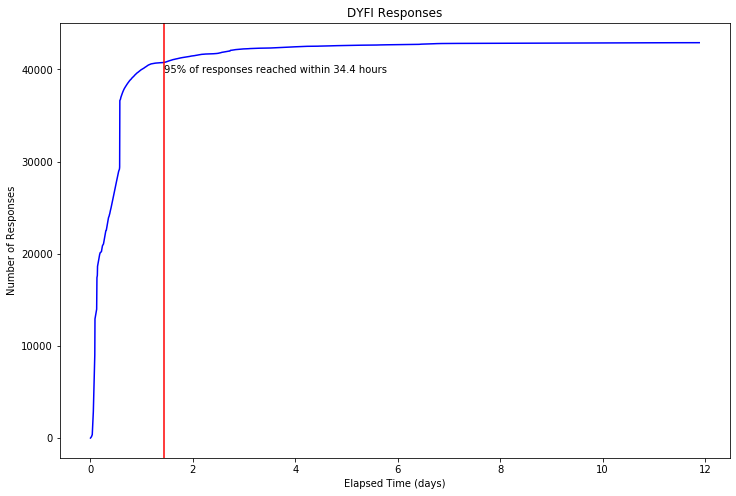

In [9]:
fig = plt.figure(figsize=(12,8));
plt.plot(dyfi_frame['Elapsed (min)']/(60*24), dyfi_frame['NumResponses'], 'b');
plt.xlabel('Elapsed Time (days)');
plt.ylabel('Number of Responses');
plt.title('DYFI Responses');
# how long did it take to get to 95% of our maximum number of responses?
max_resp_95 = dyfi_frame['NumResponses'].max()*0.95
elapsed = dyfi_frame[dyfi_frame['NumResponses'] >= max_resp_95].iloc[0]['Elapsed (min)']
elapsed_x = elapsed/(60*24)
elapsed_hrs = elapsed/60
plt.axvline(x=elapsed_x,color='r');
etext = '95%% of responses reached within %.1f hours' % elapsed_hrs
plt.text(elapsed_x, dyfi_frame['NumResponses'].mean(),etext);

Retrieve ShakeMap data

In [10]:
sm_frame = split_history_frame(dataframe,product='shakemap')
print(len(sm_frame))
sm_frame.head()

33


,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Update Time,Elapsed (min),MaxMMI,Instrumented,DYFI,Fault,GMPE,Mag,Depth
0,shakemap,ci38457511,ci38457511,True,us,1,2019-07-06 03:25:21.738,5.5,8.6,0.0,0.0,Origin,"AbrahamsonEtAl2014,BooreEtAl2014CaliforniaBasi...",7.1,-0.9
1,shakemap,ci38457511,ci38457511,True,cgs,3,2019-07-06 03:51:49.683,31.9,9.2,61.0,0.0,,BA08,7.1,-0.9
2,shakemap,ci38457511,ci38457511,True,us,2,2019-07-06 04:00:46.444,40.9,8.1,816.0,0.0,Origin,"AbrahamsonEtAl2014,BooreEtAl2014CaliforniaBasi...",7.1,-0.9
3,shakemap,ci38457511,ci38457511,True,cgs,4,2019-07-06 04:12:56.067,53.1,9.2,83.0,0.0,,BA08,7.1,-0.9
4,shakemap,ci38457511,ci38457511,True,ci,2,2019-07-06 04:17:37.814,57.7,9.4,795.0,0.0,,BA08,7.1,-0.9


Select the Southern California ShakeMaps

In [12]:
ci_frame = sm_frame[sm_frame['Product Source'] == 'ci']
ci_frame.head()

,Product,Authoritative Event ID,Code,Associated,Product Source,Product Version,Update Time,Elapsed (min),MaxMMI,Instrumented,DYFI,Fault,GMPE,Mag,Depth
4,shakemap,ci38457511,ci38457511,True,ci,2,2019-07-06 04:17:37.814,57.7,9.4,795.0,0.0,,BA08,7.1,-0.9
5,shakemap,ci38457511,ci38457511,True,ci,3,2019-07-06 04:44:59.500,85.1,9.4,826.0,0.0,,BA08,7.1,17.0
6,shakemap,ci38457511,ci38457511,True,ci,4,2019-07-06 05:26:47.524,126.9,9.4,826.0,0.0,,BA08,7.1,17.0
15,shakemap,ci38457511,ci38457511,True,ci,5,2019-07-06 15:29:29.876,729.6,9.4,856.0,0.0,,BA08,7.1,17.0
16,shakemap,ci38457511,ci38457511,True,ci,6,2019-07-07 03:30:36.286,1450.7,9.3,867.0,0.0,,BA08,7.1,2.3


Plot the number of instrumented stations over time

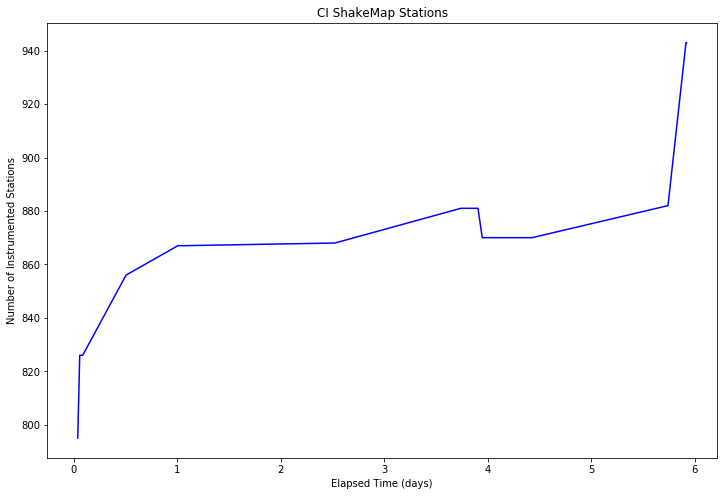

In [15]:
fig = plt.figure(figsize=(12,8));
plt.plot(ci_frame['Elapsed (min)']/(60*24), ci_frame['Instrumented'], 'b');
plt.xlabel('Elapsed Time (days)');
plt.ylabel('Number of Instrumented Stations');
plt.title('CI ShakeMap Stations Used');